In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot

In [38]:
X=pd.read_csv('world-happiness-report-2021.csv')
Y=pd.read_csv('world-happiness-report.csv')
X.sample(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
17,Czech Republic,Central and Eastern Europe,6.965,0.049,7.062,6.868,10.556,0.947,70.807,0.858,-0.208,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.700,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
108,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242
21,Bahrain,Middle East and North Africa,6.647,0.068,6.779,6.514,10.669,0.862,69.495,0.925,0.089,0.722,2.43,1.409,0.899,0.662,0.661,0.246,0.139,2.631


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [42]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [43]:
Y.rename(columns={"Country name":"country"},inplace=True)
Y.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


In [44]:
X.rename(columns={"Country name" : "country"},inplace=True)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
Standard error of ladder score,149.0,0.058752,0.022001,0.026,0.043,0.054,0.070,0.173
upperwhisker,149.0,5.648007,1.054330,2.596,4.991,5.625,6.344,7.904
lowerwhisker,149.0,5.417631,1.094879,2.449,4.706,5.413,6.128,7.780
Logged GDP per capita,149.0,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,0.114889,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,0.113332,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,0.150657,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,0.179226,0.082,0.667,0.781,0.845,0.939


In [45]:
pop=pd.read_csv("2021_population.csv")
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   iso_code           228 non-null    object
 1   country            228 non-null    object
 2   2021_last_updated  228 non-null    object
 3   2020_population    228 non-null    object
 4   area               228 non-null    object
 5   density_sq_km      228 non-null    object
 6   growth_rate        228 non-null    object
 7   world_%            228 non-null    object
 8   rank               228 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 16.2+ KB


In [46]:
pop.sample(5)

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
216,COK,Cook Islands,"17,565","17,564",236 sq_km,74/sq_km,0.01%,0.00%,221
90,SWE,Sweden,"10,157,081","10,099,265","450,295 sq_km",23/sq_km,0.60%,0.13%,91
76,BEN,Benin,"12,434,436","12,123,200","112,622 sq_km",111/sq_km,2.70%,0.16%,77
205,ASM,American Samoa,"55,100","55,191",199 sq_km,277/sq_km,-0.16%,0.00%,209
225,NIU,Niue,"1,619","1,626",260 sq_km,6/sq_km,-0.43%,0.00%,230


In [47]:
pop['2021_last_updated'] =pop['2021_last_updated'].apply(lambda x : int(str(x).replace(',','')))
pop['2020_population'] = pop['2020_population'].apply(lambda x : int(str(x).replace(',','')))
pop['density_sq_km'] = pop.density_sq_km.apply(lambda x : int(str(x).replace(',','')[:-6]))
pop['area'] = pop.area.apply(lambda x : int(str(x).replace(',','')[:-6]))
pop['growth_rate'] = pop.growth_rate.apply(lambda x : float(str(x)[:-2]))
pop['world_%'] = pop['world_%'].apply(lambda x : float(str(x)[:-2]))
pop.sample(5)

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
199,DMA,Dominica,72167,71986,751,96,0.2,0.0,203
43,PER,Peru,33339892,32971854,1285216,26,1.1,0.4,44
20,GBR,United Kingdom,68190475,67886011,242900,281,0.4,0.8,21
223,MSR,Montserrat,4977,4992,102,49,-0.3,0.0,228
146,LSO,Lesotho,2158210,2142249,30355,71,0.7,0.0,147


In [48]:
Y=Y.merge(pop,how="inner",on="country")
X=X.merge(pop,how="inner",on="country")

In [58]:
X=X.merge(Y,how="inner",on="country")

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Perceptions of corruption_x', 'density_sq_km_x', 'Social support_x', 'rank_x', '2021_last_updated_x', 'Freedom to make life choices_x', 'area_x', 'iso_code_x', 'Generosity_x', '2020_population_x', 'world_%_x', 'growth_rate_x'} in the result is deprecated and will raise a MergeError in a future version.



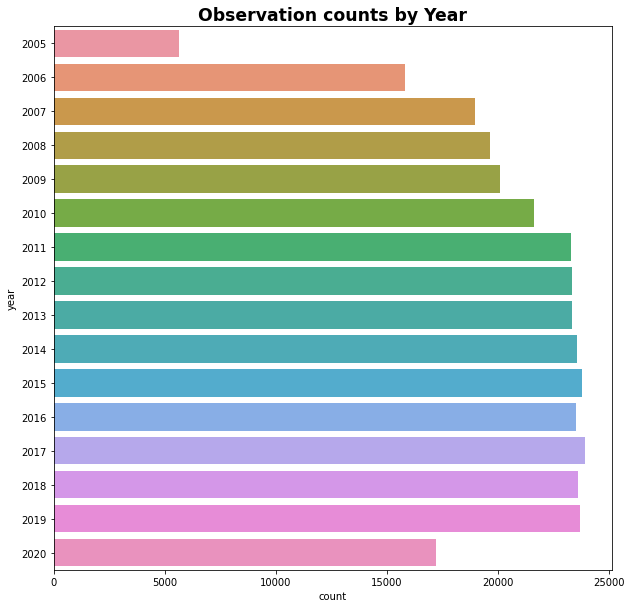

In [62]:
year_wise_cnt = X.year.value_counts()
fig, ax = plt.subplots(figsize = (10,10))
plt.title('Observation counts by Year',fontsize = 'xx-large',weight = 'bold');
sns.countplot(data = X,y ='year',ax = ax);

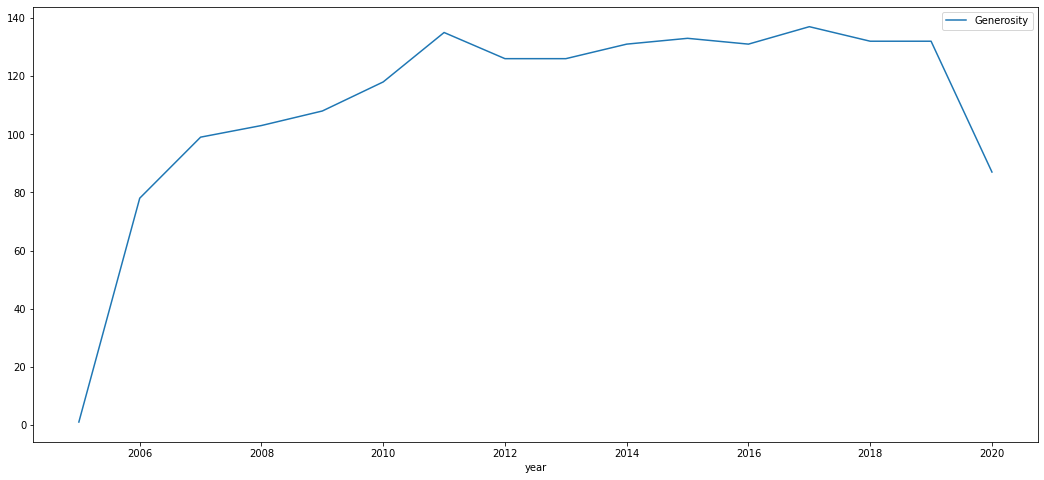

In [67]:
Y.groupby("year")[["Generosity"]].count().plot(figsize=(18,8))

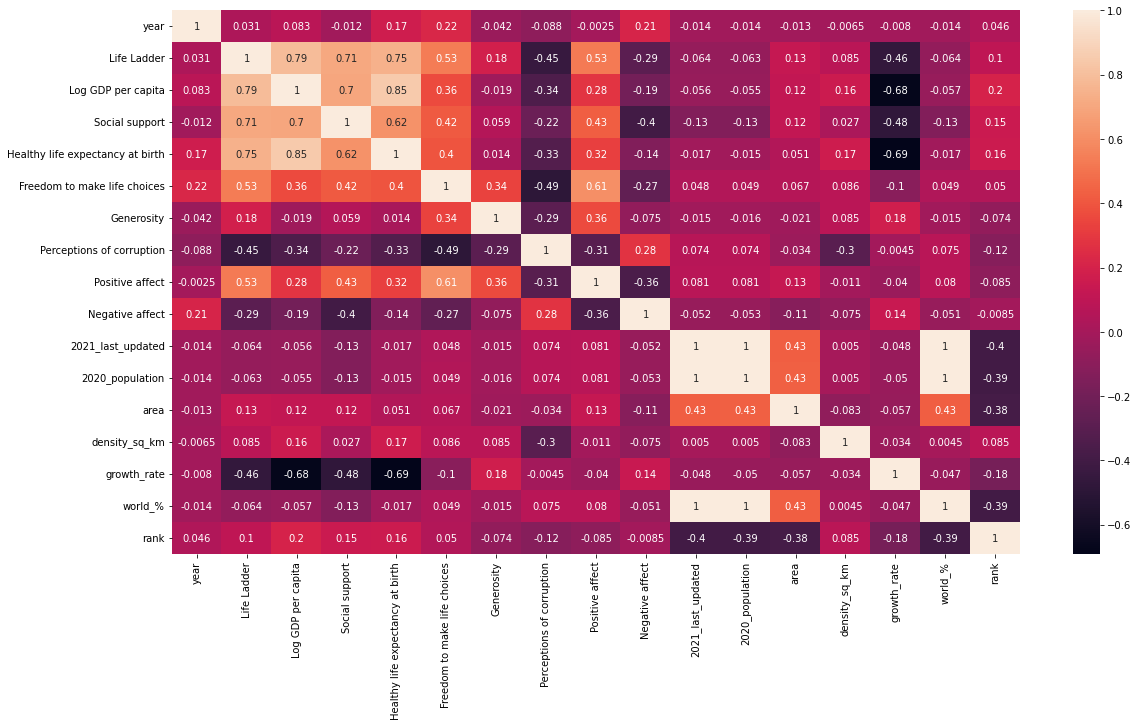

In [70]:
ax,fig=plt.subplots(figsize=(19,10))
g=sns.heatmap(Y.corr(),annot=True)